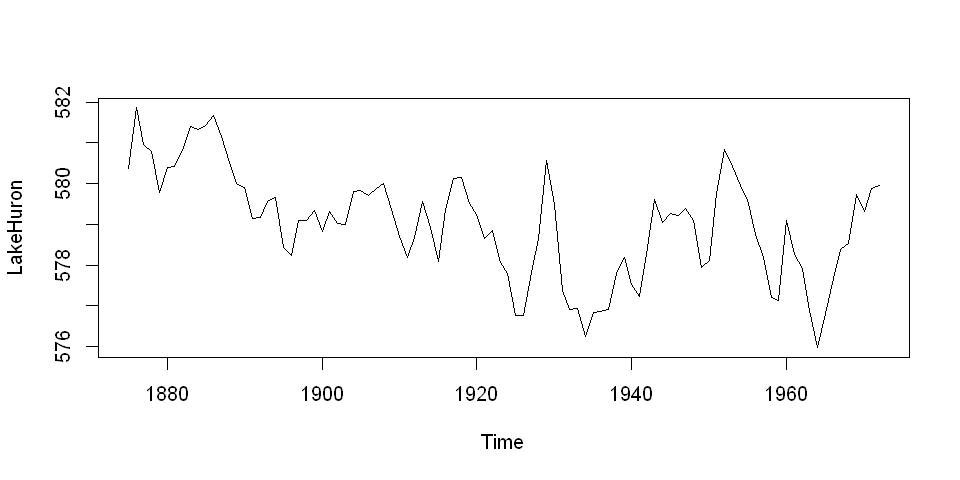

In [1]:
options(repr.plot.width=8, repr.plot.height=4)
plot(LakeHuron)

In [2]:
ts.data <- diff(LakeHuron)

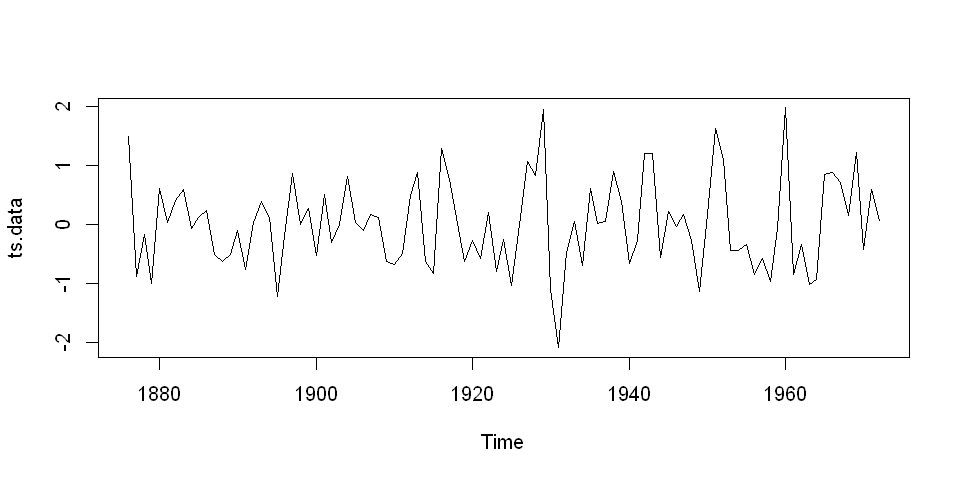

In [3]:
plot(ts.data)

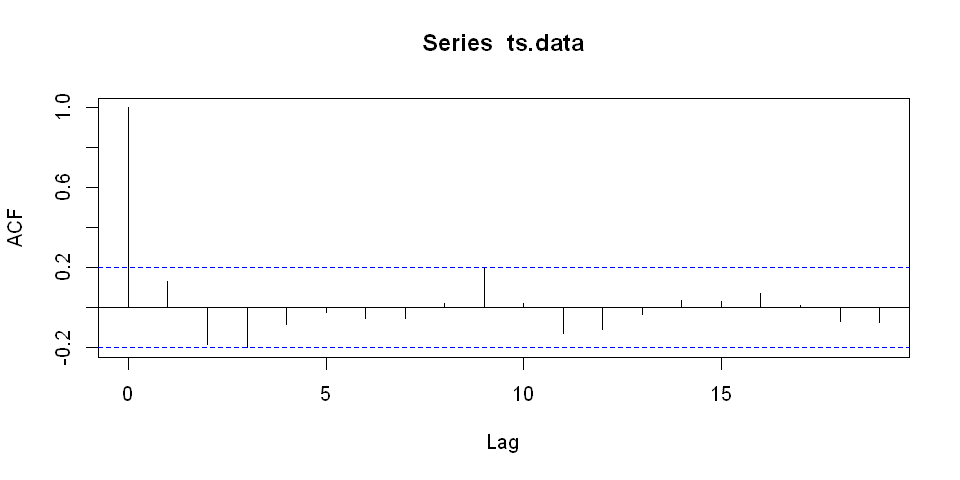

In [4]:
acf(ts.data)

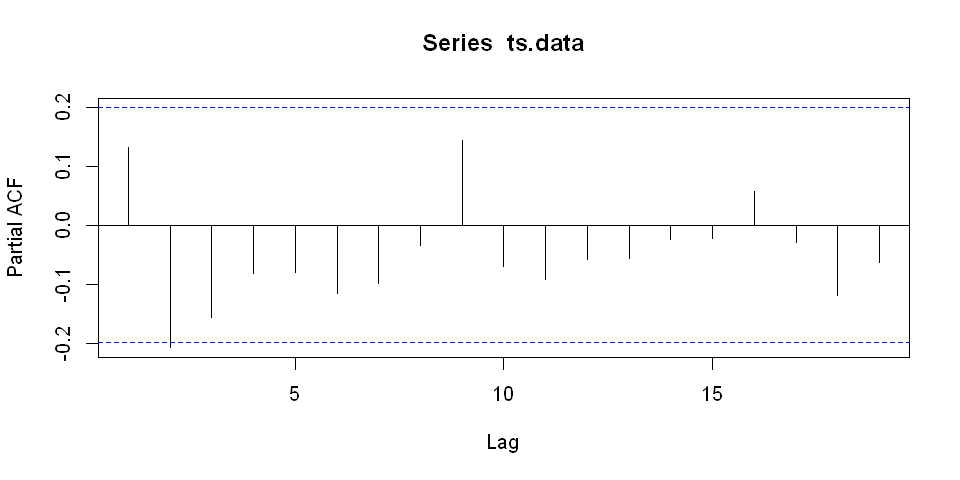

In [5]:
pacf(ts.data)

In [6]:
p <- 2
r <- acf(ts.data, plot=F)$acf[2:(p+1)]
r

[1]  0.1319241 -0.1870874

In [7]:
R <- matrix(1, p, p)
for(i in 1:p) {
    for(j in 1:p) {
        if(i != j) {
            R[i, j] <- r[abs(i - j)]
        }
    }
}
R

1.0000000,0.1319241
0.1319241,1.0000000


In [8]:
b <- matrix(r, p, 1)
b

0.1319241
-0.1870874


In [9]:
phi.hat <- solve(R, b)
phi.hat

0.1593793
-0.2081134


In [10]:
c0 <- acf(ts.data, type='covariance', plot=F)$acf[1]
var.hat <- c0*(1 - sum(phi.hat*r))
var.hat

[1] 0.5219945

In [11]:
cat("Coeffcinets:", phi.hat, "\nVariance:", var.hat)

Coeffcinets: 0.1593793 -0.2081134 
Variance: 0.5219945

Final model:

$$ Y_t = 0.1593793 X_{t-1} - 0.2081134 Y_{t-2} + e_t$$

where

$$ e_t \sim N(0, 0.5219945) $$
$$ Y_t = X_t - X_{t-1} $$

That is
$$ (1 - 0.1593793B + 0.2081134B^2)Y_t = e_t$$
$$ (1 - 0.1593793B + 0.2081134B^2)(1 - B)X_t = e_t $$